In [2]:
import pandas as pd

# Load the dataset
file_path = 'HousingData.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset for inspection
data.head(), data.info(), data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


(      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
 0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
 1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
 2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
 3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
 4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   
 
         B  LSTAT  MEDV  
 0  396.90   4.98  24.0  
 1  396.90   9.14  21.6  
 2  392.83   4.03  34.7  
 3  394.63   2.94  33.4  
 4  396.90    NaN  36.2  ,
 None,
              CRIM          ZN       INDUS        CHAS         NOX          RM  \
 count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
 mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
 std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
 min      0.006320  

In [3]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Display missing values per column
missing_values


,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [4]:
# Replace missing values with median for numerical columns
numerical_cols = ['CRIM', 'ZN', 'INDUS', 'AGE', 'LSTAT']
for col in numerical_cols:
    data[col].fillna(data[col].median(), inplace=True)

# Replace missing values with mode for categorical column 'CHAS'
data['CHAS'].fillna(data['CHAS'].mode()[0], inplace=True)

# Verify if all missing values are handled
missing_values_after = data.isnull().sum()

# Display missing values after handling
missing_values_after


<ipython-input-4-77b62e007743>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
<ipython-input-4-77b62e007743>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target variable (y)
X = data.drop(columns=['MEDV'])
y = data['MEDV']

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((404, 13), (102, 13), (404,), (102,))

In [6]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 24.999384790103367
Mean Absolute Error: 3.1487373170237607
R^2 Score: 0.659101389390351


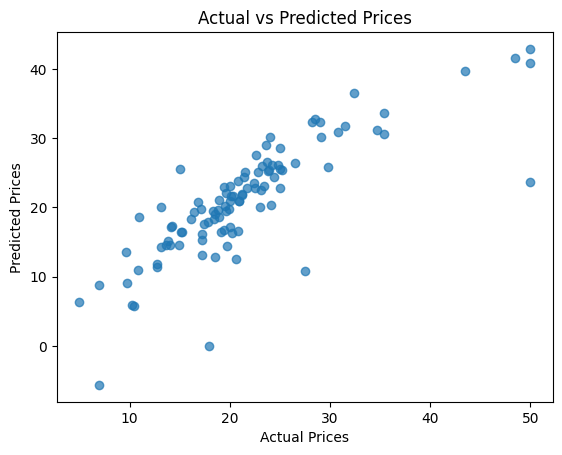

In [8]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()
